## Question-1

### Graph Parameters
- Firstly we defined the number of nodes and degree for each edge.
- We took Number of Nodes(N) to be 1500
- We took Degree(k) of each Node to be 50

In [108]:
NUMBER_OF_NODES = 1500
INITIAL_AVG_DEGREE = 50

### Generating Regular Graph
- We started with making the regular graph with the defined parameters.
- For this, we first initialize an empty AJD_MATRIX of size NUM_NODES X NUM_NODES.
- Next, we split the Edges into two groups: left and right edges.
- The number of left edges would be Degree/2.
- The number of right edges would be Degree - number of left edges.
- Next, we ran a simple for loop logic to connect two edges, we first check whether taking this edge is allowed or not, by checking if it is less than number of nodes for right edges, if yes then directly mark 1 for this connection in the adj matrix and if no then account for a left edge for this, so as to keep the number of edges equal to the degree.
- Similarly, for left edges we first checked if it is greater than 0, if yes then directly mark 1 for this connection in the adj matrix and if no then account for a right edge for this, so as to keep the number of edges equal to the degree.
- After this we got our initial regular graph.

In [109]:
# generating the ring link graph

ADJ_MATRIX = []
for i in range(0,NUMBER_OF_NODES):
    current_row = []
    for j in range(0,NUMBER_OF_NODES):
        current_row.append(0)
    ADJ_MATRIX.append(current_row)

EDGES_TO_LEFT = INITIAL_AVG_DEGREE // 2
EDGES_TO_RIGHT = INITIAL_AVG_DEGREE - EDGES_TO_LEFT

for choosen_node in range(0,NUMBER_OF_NODES):
    RIGHT_BOUND = choosen_node + EDGES_TO_RIGHT
    if(RIGHT_BOUND < NUMBER_OF_NODES):
        for neighbour in range(choosen_node+1,RIGHT_BOUND):
            ADJ_MATRIX[choosen_node][neighbour]=1
            ADJ_MATRIX[neighbour][choosen_node] = 1
    else:
        ALLOWED_RIGHT_BOUND = NUMBER_OF_NODES - choosen_node -1
        for neighbour in range(choosen_node+1,NUMBER_OF_NODES):
            ADJ_MATRIX[choosen_node][neighbour]=1
            ADJ_MATRIX[neighbour][choosen_node] = 1

        RIGHT_BOUND_LEFT = EDGES_TO_RIGHT - (ALLOWED_RIGHT_BOUND )
        for neighbour in range(RIGHT_BOUND_LEFT):
            ADJ_MATRIX[choosen_node][neighbour]=1
            ADJ_MATRIX[neighbour][choosen_node] = 1


    LEFT_BOUND = choosen_node - EDGES_TO_LEFT
    if LEFT_BOUND >= 0:
        for neighbour in range(LEFT_BOUND, choosen_node):
            ADJ_MATRIX[choosen_node][neighbour] = 1
            ADJ_MATRIX[neighbour][choosen_node] = 1
    else:
        ALLOWED_LEFT_BOUND = choosen_node
        for neighbour in range(0, choosen_node):
            ADJ_MATRIX[choosen_node][neighbour] = 1
            ADJ_MATRIX[neighbour][choosen_node] = 1

        LEFT_BOUND_LEFT = EDGES_TO_LEFT - ALLOWED_LEFT_BOUND -1
        for neighbour in range(NUMBER_OF_NODES - LEFT_BOUND_LEFT, NUMBER_OF_NODES):
            ADJ_MATRIX[choosen_node][neighbour] = 1
            ADJ_MATRIX[neighbour][choosen_node] = 1


### Writing Functions for BFS, Calculation of Path Length And Calculation of Clustering Coefficient
- To calculate the avg path length we use the following formula:-
- Average Path Length = Total Distance / Number of Valid Pairs


- Clustering Coefficient (C) = (2 * Number of Actual Edges Between Neighbors) / (Degree of Node * (Degree of Node - 1))
  
Where:
- **Number of Actual Edges Between Neighbors** is the number of edges that actually exist between the neighbors of the node.
- **Degree of Node** is the number of neighbors connected to the node.

The clustering coefficient measures how interconnected the neighbors of a node are to each other. A high clustering coefficient indicates that the node’s neighbors are densely connected.

In [ ]:
from collections import deque

def bfs(source, num_nodes,adj_list):
    distances={}
    for i in range(num_nodes):
        distances[i]=float('inf')
    distances[source] = 0
    queue = deque([source])

    while queue:
        node = queue.popleft()
        for neighbor in adj_list[node]:
            if distances[neighbor] == float('inf'):
                distances[neighbor] = distances[node] + 1
                queue.append(neighbor)

    return distances


def calculate_avg_path_length(ADJ_MATRIX):
    num_nodes=len(ADJ_MATRIX)
    ADJ_LIST = {}

    for i in range(num_nodes):
        ADJ_LIST[i]=[]

    for i in range(num_nodes):
        for j in range(num_nodes):
            if(ADJ_MATRIX[i][j]==1):
                ADJ_LIST[i].append(j)

    TOTAL_DISTANCE=0
    PAIRS=0
    max_path_length=-1

    for node in range(num_nodes):
        temp_list=[]
        distance_array = bfs(node,num_nodes,ADJ_LIST)
        for dst in range(num_nodes):
            if((node!=dst) and (distance_array[dst]!=float('inf'))):
                TOTAL_DISTANCE+=distance_array[dst]
                PAIRS+=1
        for dist in distance_array.values():
            if dist != float('inf'):
                temp_list.append(dist)
        max_path_length=max(max_path_length,max(temp_list))

    avg_path_length=TOTAL_DISTANCE/PAIRS
    return avg_path_length



def find_clustering_coefficient(adj_matrix):
    num_nodes=len(adj_matrix)
    sum_of_coefficients = 0

    for src in range(num_nodes):
        degree=0
        neighbours=[]
        comman_edge=0
        for dst in range(num_nodes):
            if(adj_matrix[src][dst]==1):
                degree+=1
                neighbours.append(dst)

        if(degree < 2):
            continue

        for i in range(degree):
            for j in range(i + 1, degree):
                if adj_matrix[neighbours[i]][neighbours[j]] == 1:
                    comman_edge += 1

        coefficinet=(2*(comman_edge))/(degree*(degree-1))
        sum_of_coefficients+=coefficinet

    avg_clustering_coefficient = sum_of_coefficients / num_nodes
    return avg_clustering_coefficient



### Finding the Initial Path Length And Clustering Coefficient
- Next, we stored the path lengths and clustering coefficient for the regular graph, in order to scale the later values.

In [111]:
ORIGINAL_PATH_LENGTH = calculate_avg_path_length(ADJ_MATRIX)
ORIGINAL_CLUSTERING_COEFF = find_clustering_coefficient(ADJ_MATRIX)

print(ORIGINAL_PATH_LENGTH)
print(ORIGINAL_CLUSTERING_COEFF)

15.490326884589727
0.7346938775510015


### Rewiring the Edges

1. Loop through each node in the adjacency matrix.
2. Identify its neighbors from the original ring lattice.
3. With probability `p`, each edge `(node, neighbor)` is rewired:
   - Remove the existing edge.
   - Find a new random node that is not already connected.
   - Create a new edge to this random node.
4. Repeat for different `p` values to observe the transition from a regular lattice to a random graph.

In [112]:
import copy
import random
import numpy as np
random.seed(34322341)
ORIGINAL_ADJ_MATRIX = copy.deepcopy(ADJ_MATRIX)


P_VALUES = np.logspace(-4, 0, num=20)
P_VALUES = [round(p, 6) for p in P_VALUES]
num_nodes = len(ORIGINAL_ADJ_MATRIX)

DATA_GATHERED = []

for p in P_VALUES:
    #print(p)
    new_adj = copy.deepcopy(ADJ_MATRIX)
    for node in range(num_nodes):
        neighbours=[]
        for i in range(num_nodes):
            if(ORIGINAL_ADJ_MATRIX[node][i]==1):
                neighbours.append(i)

        for neighbour in neighbours:
            if node < neighbour:
                kya_tujhe_rewire_kru = random.random()
                if(p > kya_tujhe_rewire_kru):
                    new_adj[node][neighbour]=0
                    new_adj[neighbour][node]=0

                    not_found = True

                    while not_found:
                        random_edge = random.randint(0,num_nodes-1)

                        if((random_edge !=node) and (new_adj[node][random_edge]==0)):
                            new_adj[node][random_edge]=1
                            new_adj[random_edge][node]=1
                            not_found = False


    mera_path_length = calculate_avg_path_length(new_adj)
    mera_clustering_coeff = find_clustering_coefficient(new_adj)
    DATA_GATHERED.append({p:[mera_path_length/ORIGINAL_PATH_LENGTH,mera_clustering_coeff/ORIGINAL_CLUSTERING_COEFF]})



### Plotting The Data

- Next we simply plot the clustering coefficient obtained and the average path lengths using the matplotlib.

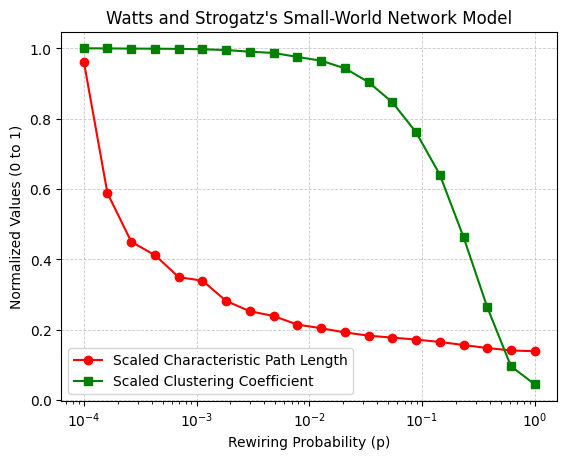

In [113]:
import matplotlib.pyplot as plt

all_path_lengths = []
all_clustering_coeff = []

for all_data in DATA_GATHERED:
    dict = list(all_data.values())
    path_length = dict[0][0]
    clustering_coeff = dict[0][1]
    all_path_lengths.append(path_length)
    all_clustering_coeff.append(clustering_coeff)

plt.plot(P_VALUES, all_path_lengths, 'r-o', label='Scaled Characteristic Path Length')
plt.plot(P_VALUES, all_clustering_coeff, 'g-s', label='Scaled Clustering Coefficient')

plt.xscale('log')

plt.xlabel("Rewiring Probability (p)")
plt.ylabel("Normalized Values (0 to 1)")
plt.title("Watts and Strogatz\'s Small-World Network Model")

plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.7)
plt.legend()
plt.show()